C:\Users\DELL\AppData\Local\Temp\ipykernel_18652\35865841.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


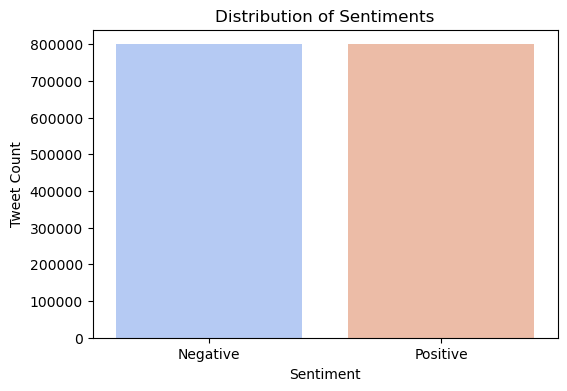

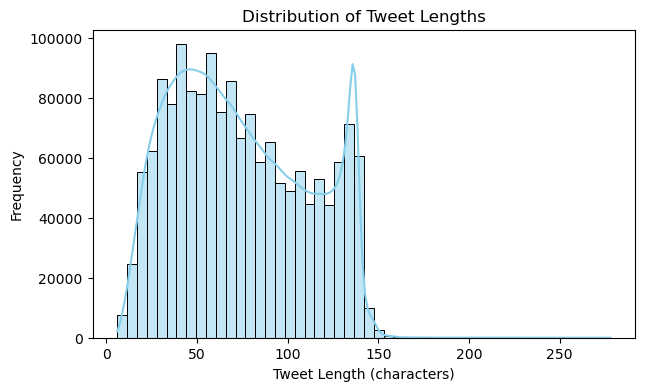

C:\Users\DELL\AppData\Local\Temp\ipykernel_18652\35865841.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')


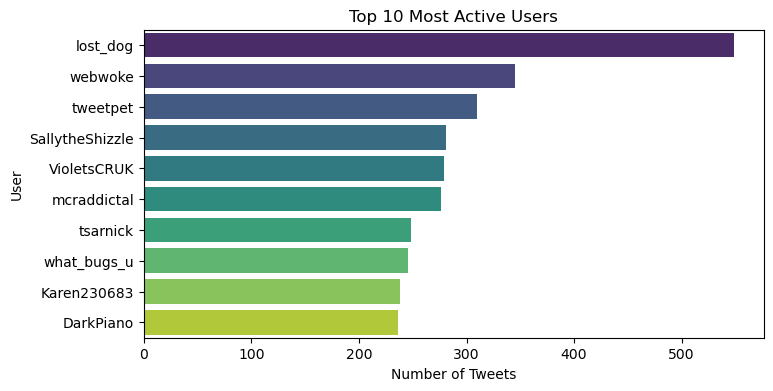

C:\Users\DELL\AppData\Local\Temp\ipykernel_18652\35865841.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='tweet_length', data=df, palette='Set2')


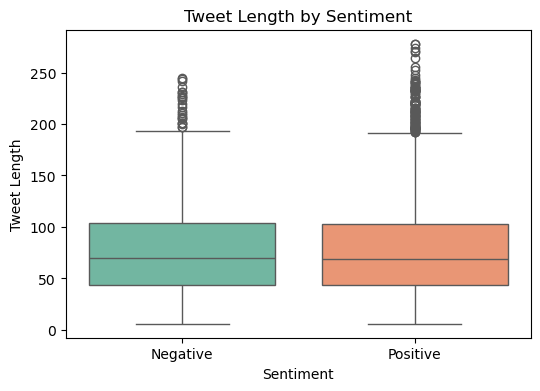

C:\Users\DELL\AppData\Local\Temp\ipykernel_18652\35865841.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=pos_df, ax=axes[0], palette='Greens_r')
C:\Users\DELL\AppData\Local\Temp\ipykernel_18652\35865841.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=neg_df, ax=axes[1], palette='Reds_r')


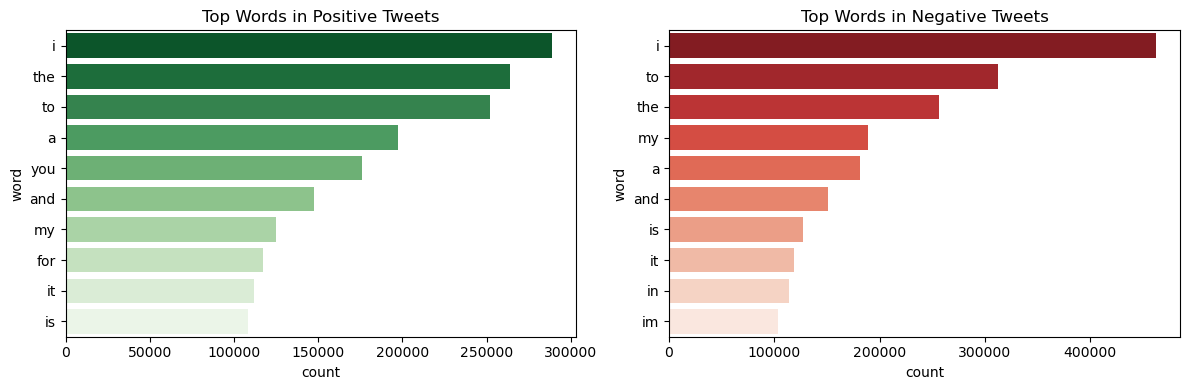

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#LOAD CLEANED DATA 
df = pd.read_csv(r"C:\Users\DELL\Downloads\twitter_sentiment_cleaned.csv")

# Optional: assign column names if not saved earlier
df.columns = ["target", "ids", "date", "flag", "user", "text"]

# Map sentiment labels for readability (0 = negative, 4 = positive)
df['sentiment'] = df['target'].map({0: 'Negative', 4: 'Positive'})

# ========== PLOT 1: Sentiment Distribution ==========
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

#  PLOT 2: Tweet Length Distribution 
df['tweet_length'] = df['text'].str.len()

plt.figure(figsize=(7,4))
sns.histplot(df['tweet_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()


# PLOT 3: Most Active Users 
top_users = df['user'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')
plt.title('Top 10 Most Active Users')
plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.show()

# PLOT 4: Sentiment by Tweet Length =
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='tweet_length', data=df, palette='Set2')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

# PLOT 5: Common Words in Positive vs Negative Tweet
from collections import Counter
import re

def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z ]", "", text)
    return text.lower()

df['clean_text'] = df['text'].apply(clean_text)

# Separate positive and negative words
pos_words = " ".join(df[df['sentiment']=='Positive']['clean_text']).split()
neg_words = " ".join(df[df['sentiment']=='Negative']['clean_text']).split()

# Count most common words
pos_common = Counter(pos_words).most_common(10)
neg_common = Counter(neg_words).most_common(10)

# Create DataFrame for plotting
pos_df = pd.DataFrame(pos_common, columns=['word','count'])
neg_df = pd.DataFrame(neg_common, columns=['word','count'])

fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x='count', y='word', data=pos_df, ax=axes[0], palette='Greens_r')
sns.barplot(x='count', y='word', data=neg_df, ax=axes[1], palette='Reds_r')
axes[0].set_title('Top Words in Positive Tweets')
axes[1].set_title('Top Words in Negative Tweets')
plt.tight_layout()
plt.show()
